#Introuduction

**Purpose**

The purpose of this notebook is to explain simple linear regression model with the help of python library. The dataset that we have taken contains the number of years and salary data of employess within the organization  



**Dataset**
You can download dataset from this link
Link: https://raw.githubusercontent.com/nitindig/datascience/master/regression/Salary_Data.csv


**Features**
It Contains following fields - Years of Experience and Salary

# Libraries to Import

**NumPy** -  is a library for the Python programming language, adding support for **large, multi-dimensional arrays and matrices, along with a large collection of high-level mathematical functions to operate on these arrays.**


**Pandas** - In computer programming, pandas is a software library written for the Python programming language for data manipulation and analysis. In particular, it offers data structures and operations for manipulating numerical tables and time series.

**Matplotlib** - is a plotting library for the Python programming language and its numerical mathematics extension NumPy.You can generate plots, histograms, power spectra, bar charts, errorcharts, scatterplots, etc

**The seaborn package** was developed based on the Matplotlib library. It is used to create more attractive and informative statistical graphics. While seaborn is a different package, it can also be used to develop the attractiveness of matplotlib graphics. While matplotlib is great, we always want to do better.


In [ ]:
# Simple Linear Regression

# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sys
import os
import seaborn as sns





#Basic Information about Dataset

The dataset is located in github in following library : https://raw.githubusercontent.com/nitindig/datascience/master/regression/Salary_Data.csv

The first important task is to get the dataset and understand it. We use Pandas functions to retrieve dataset and understand different features. Pandas documenation and function can be found here https://pandas.pydata.org/pandas-docs/stable/index.html under various heads.

The following piece of code reads dataset and create padas Object we call it as dataframe.

Info(), head(), tail() functions help you to understand the dataset features. Based upon code execution we can see that there are 30 rows and it contains years of experience and salary as columns



In [ ]:
url = 'https://raw.githubusercontent.com/nitindig/datascience/master/regression/Salary_Data.csv'

# Importing the dataset
dataset = pd.read_csv(url)

print("There are",len(dataset.columns),"columns:")

for x in dataset.columns:
    sys.stdout.write(str(x)+", ")

print("\n************")
print("Dataset Info:")
print(dataset.info())
print("\n************")
print("First 10 rows in dataset")
print(dataset.head(10))
print("\n************")
print("Last 10 rows in dataset")
print(dataset.tail(10))

There are 2 columns:
YearsExperience, Salary, 
************
Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes
None

************
First 10 rows in dataset
   YearsExperience   Salary
0              1.1  39343.0
1              1.3  46205.0
2              1.5  37731.0
3              2.0  43525.0
4              2.2  39891.0
5              2.9  56642.0
6              3.0  60150.0
7              3.2  54445.0
8              3.2  64445.0
9              3.7  57189.0

************
Last 10 rows in dataset
    YearsExperience    Salary
20              6.8   91738.0
21              7.1   98273.0
22              7.9  101302.0
23              8.2  113812.0
24              8.7  109431.0
25              9.0  1055

As problem states that we want to predict salary of employees based upon their experince. Hence by definition of linear regression we want to predict Y

 y = B01 + B1x + e

 i.e Salary = B0 + B1(YearsExperience) + error

 Lets start getting our X and Y.

 iloc is the function which is used to get data from pandas dataframe from particular row or columns

**Single selections using iloc and DataFrame**



```
# This is formatted as code
**Rows**:

dataset.iloc[0] # first row of data frame
dataset.iloc[1] # second row of data frame
dataset.iloc[-1] # last row of data frame

**Columns**:

dataset.iloc[:,0] # first column of data frame (first_name)
dataset.iloc[:,1] # second column of data frame (last_name)
dataset.iloc[:,-1] # last column of data frame (id)
```



In [ ]:
dataset

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [ ]:
X = dataset.iloc[:, :1].values
y = dataset.iloc[:, -1].values

print("Years of Experience",X)
print("Salary",y)

Years of Experience [[ 1.1]
 [ 1.3]
 [ 1.5]
 [ 2. ]
 [ 2.2]
 [ 2.9]
 [ 3. ]
 [ 3.2]
 [ 3.2]
 [ 3.7]
 [ 3.9]
 [ 4. ]
 [ 4. ]
 [ 4.1]
 [ 4.5]
 [ 4.9]
 [ 5.1]
 [ 5.3]
 [ 5.9]
 [ 6. ]
 [ 6.8]
 [ 7.1]
 [ 7.9]
 [ 8.2]
 [ 8.7]
 [ 9. ]
 [ 9.5]
 [ 9.6]
 [10.3]
 [10.5]]
Salary [ 39343.  46205.  37731.  43525.  39891.  56642.  60150.  54445.  64445.
  57189.  63218.  55794.  56957.  57081.  61111.  67938.  66029.  83088.
  81363.  93940.  91738.  98273. 101302. 113812. 109431. 105582. 116969.
 112635. 122391. 121872.]


# Splitting Dataset into Training and Test Set

As I said before, the data we use is usually split into training data and test data. The training set contains a known output and the model learns on this data in order to be generalized to other data later on. We have the test dataset (or subset) in order to test our model’s prediction on this subset.

Train/Test Split
Let’s see how to do this in Python. We’ll do this using the Scikit-Learn library and specifically the train_test_split method. We’ll start with importing the necessary libraries:

Now we can use the train_test_split function in order to make the split. The test_size=0.2 inside the function indicates the percentage of the data that should be held over for testing. It’s usually around 80/20 or 70/30.


Scikit documenation can be found over here: https://scikit-learn.org/stable/documentation.html#

The output of this function is we get our training and test set as below

X_train : Training set of our predictor values
X_test: Test set of our predictor values. Once model is trainned and we find best slope, we would predict the value for X_test
y_train: Training set of dependent variables
y_test: Test set of dependent variables


Documentation of train_test_split can be found over : https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html


In [ ]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)




# Fitting Simple Linear Regression to the Training set
From Sklearn, I’ve imported the linear_model, so I can run a linear regression.

Now we’ll fit the model on the training data:



In [ ]:

# Fitting Simple Linear Regression to the Training set
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)



LinearRegression()

fit(self, X, y[, sample_weight])	Fit linear model.
get_params(self[, deep])	Get parameters for this estimator.
predict(self, X)	Predict using the linear model
score(self, X, y[, sample_weight])	Returns the coefficient of determination R^2 of the prediction.
set_params(self, \*\*params)	Set the parameters of this estimator.


**R-squared** is a statistical measure of how close the data are to the fitted regression line. It is also known as the coefficient of determination, or the coefficient of multiple determination for multiple regression. ... 100% indicates that the model explains all the variability of the response data around its mean

In [ ]:
# Predicting the Test set results
y_pred = regressor.predict(X_test)
y_pred_train = regressor.predict(X_train)


# print model score
print("Model Score: ", regressor.score(X_test, y_test))

# print r_square_score
from sklearn.metrics import r2_score
print("R_square score: ", r2_score(y_test,y_pred))

Model Score:  0.988169515729126
R_square score:  0.988169515729126


# Data Visulaization

FInally we use matplotlib libaries to plot the graph

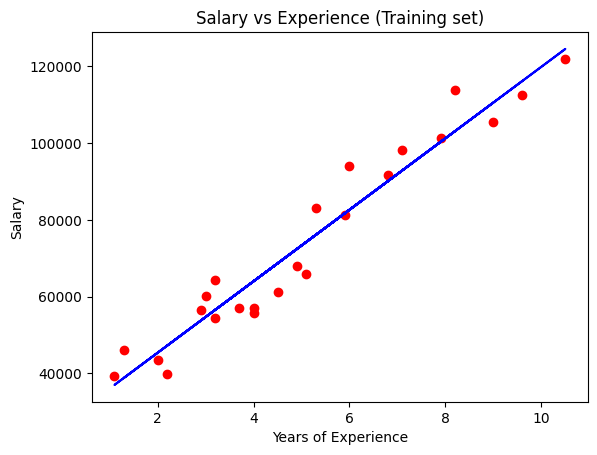

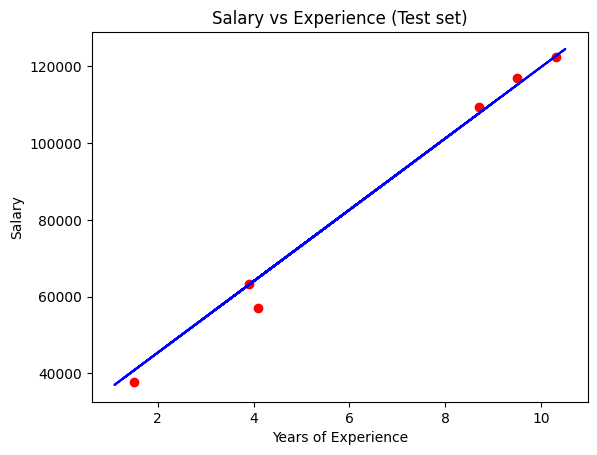

In [ ]:
# Visualising the Training set results
plt.scatter(X_train, y_train, color = 'red')
plt.plot(X_train, regressor.predict(X_train), color = 'blue')
plt.title('Salary vs Experience (Training set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

# Visualising the Test set results
plt.scatter(X_test, y_test, color = 'red')
plt.plot(X_train, regressor.predict(X_train), color = 'blue')
plt.title('Salary vs Experience (Test set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

The model score is .98 which is pretty good in above case.

Once we have trained our model we can use to predict salary of employee based upon experience.

Let say 2 employees join one with 2 year of experience and one with 4 years of experience. What would be their salaries? we can easily predict it since our model is trainned.



In [1]:
X_future_expereince = [[2],[6]]

print ("Salaries of new employess joining would be :", regressor.predict(X_future_expereince))

NameError: name 'regressor' is not defined

In [ ]:
new_employees_age=[[8],[10]]
print(regressor.predict(new_employees_age))

[101280.70016446 119905.85041792]
